# Wikipedia web-scraping and NLP
### Importing libraries

In [75]:
#import sys
#!{sys.executable} -m pip install nltk

import nltk
#nltk.download('all')

# Techniques with NLP

## Getting ngrams - tokens of size n

In [113]:
q = 'If you never try you will never know'
qtokens = nltk.word_tokenize(q)
bigrams = list(nltk.ngrams(qtokens,2)) #here n = 2
bigrams

[('If', 'you'),
 ('you', 'never'),
 ('never', 'try'),
 ('try', 'you'),
 ('you', 'will'),
 ('will', 'never'),
 ('never', 'know')]

## Stemming methods
### 1. Porter Stemming (passive method)

In [85]:
from nltk.stem import PorterStemmer
pst = PorterStemmer()
pst.stem('making')

'make'

### 2. Lancaster Stemming (aggressive stemming method)

In [87]:
from nltk.stem import LancasterStemmer
lst = LancasterStemmer()
lst.stem('making')

'mak'

In [93]:
for word in qtokens:
    print(word+"-"+lst.stem(word))

If-if
you-you
never-nev
try-try
you-you
will-wil
never-nev
know-know


## Lemmatization

In [95]:
from nltk.stem import wordnet
from nltk.stem import WordNetLemmatizer
word_lem = WordNetLemmatizer()

word_lem.lemmatize('corpora')

'corpus'

## Stopwords

In [101]:
from nltk.corpus import stopwords
print('Number of stopwords in NLTK corpus is {}'.format(len(stopwords.words('english'))))
#print(stopwords.words('english'))

Number of stopwords in NLTK corpus is 179


## Remove punctuation

In [108]:
sentence = 'If you give me 2 chips now, I will give you 4 chips later. Deal?'
words_in_sent = nltk.word_tokenize(sentence)
import re
punctuation = re.compile(r'[-.?!,:;()|0-9]')

post_punctuation = []
for word in words_in_sent:
    word = punctuation.sub("",word)
    if len(word)>0:
        post_punctuation.append(word)

post_punctuation

['If',
 'you',
 'give',
 'me',
 'chips',
 'now',
 'I',
 'will',
 'give',
 'you',
 'chips',
 'later',
 'Deal']

## POS tagging (Parts of Speech)

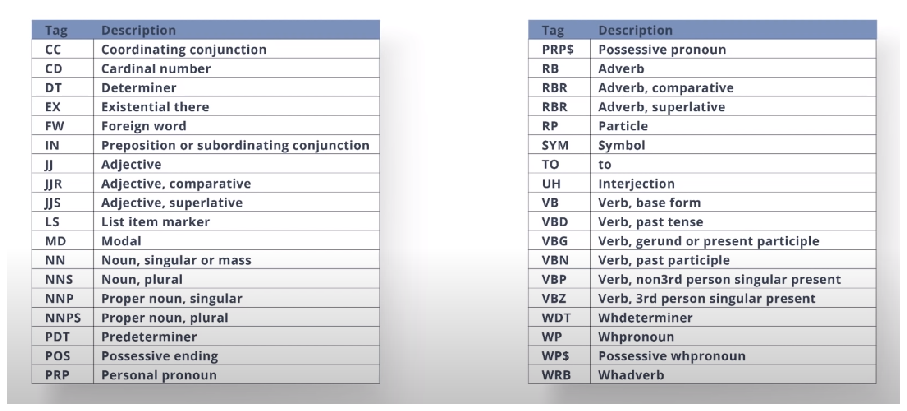

In [112]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('POS_tags.png')
plt.figure(figsize = (16,12))
plt.imshow(img)
plt.axis('off')
plt.show()

In [116]:
for word in words_in_sent:
    print(nltk.pos_tag([word]))

[('If', 'IN')]
[('you', 'PRP')]
[('give', 'VB')]
[('me', 'PRP')]
[('2', 'CD')]
[('chips', 'NNS')]
[('now', 'RB')]
[(',', ',')]
[('I', 'PRP')]
[('will', 'MD')]
[('give', 'VB')]
[('you', 'PRP')]
[('4', 'CD')]
[('chips', 'NNS')]
[('later', 'RB')]
[('.', '.')]
[('Deal', 'NN')]
[('?', '.')]


## Named Entity Recognition (NER)

In [140]:
from nltk import ne_chunk
NE_sent = 'Obama announced that NASA and SpaceX will launch a space shuttle tomorrow'

In [141]:
NE_tokens = nltk.word_tokenize(NE_sent)
NE_tags = nltk.pos_tag(NE_tokens)

In [142]:
NE_NER = ne_chunk(NE_tags)
print(NE_NER)

(S
  (PERSON Obama/NNP)
  announced/VBD
  that/IN
  (ORGANIZATION NASA/NNP)
  and/CC
  (ORGANIZATION SpaceX/NNP)
  will/MD
  launch/VB
  a/DT
  space/NN
  shuttle/NN
  tomorrow/NN)


# Web-scraping
## Scrape contents of a webpage using 'urllib' module

In [189]:
import urllib.request
response = urllib.request.urlopen('https://en.wikipedia.org/wiki/SpaceX')
html = response.read()
print(html[:400])

b'\n<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>SpaceX - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","Septemb'


## Use 'Beautiful Soup' module extract clean text from HTML data without any HTML tags

In [190]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html,'html5lib')
text = soup.get_text(strip = True)
print(text[:400])

SpaceX - Wikipediadocument.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"1c938fd0-f5e8-467d-958e-5756c7062f9c","wgCSPNonce":!1,"wgCanonicalN


### Convert text to lower case

In [145]:
lower_text = text.lower()

### Splitting text into word tokens

In [191]:
tokens = nltk.word_tokenize(lower_text) #Use sent_tokenize for sentence tokens
print(tokens[:100])

['spacex', '-', 'wikipediadocument.documentelement.classname=', "''", 'client-js', "''", ';', 'rlconf=', '{', '``', 'wgbreakframes', "''", ':', '!', '1', ',', "''", 'wgseparatortransformtable', "''", ':', '[', '``', "''", ',', "''", "''", ']', ',', "''", 'wgdigittransformtable', "''", ':', '[', '``', "''", ',', "''", "''", ']', ',', "''", 'wgdefaultdateformat', "''", ':', "''", 'dmy', "''", ',', "''", 'wgmonthnames', "''", ':', '[', '``', "''", ',', "''", 'january', "''", ',', "''", 'february', "''", ',', "''", 'march', "''", ',', "''", 'april', "''", ',', "''", 'may', "''", ',', "''", 'june', "''", ',', "''", 'july', "''", ',', "''", 'august', "''", ',', "''", 'september', "''", ',', "''", 'october', "''", ',', "''", 'november', "''", ',']


### Remove stopwords from tokens list

In [151]:
from nltk.corpus import stopwords
weed = stopwords.words('english')

valid_tokens = tokens[:]

for token in tokens:
    if token in weed:
        valid_tokens.remove(token)

In [152]:
len(tokens)

20510

In [153]:
len(valid_tokens)

16998

In [154]:
freq = nltk.FreqDist(valid_tokens)
#for key,val in freq.items():
#    print(str(key) + ':' + str(val))

print(freq.most_common(10))

[(',', 1156), ("''", 1028), ('.', 858), ('[', 388), (']', 388), ('spacex', 365), ('(', 347), (')', 347), (':', 246), ('``', 244)]


#### _This list of tokens contain punctuation_
## Removing punctuation

#### _We are removing all non alphabetic characters which removes punctuations and symbols_


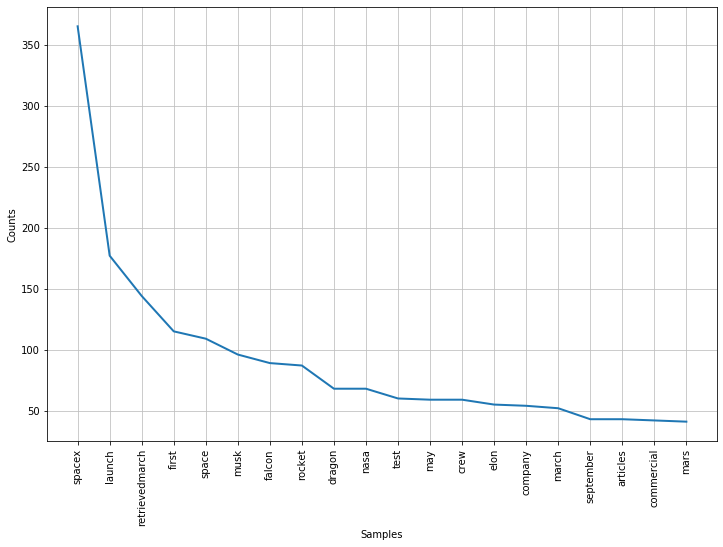

In [175]:
true_tokens = [word for word in valid_tokens if word.isalpha()]

freq2 = nltk.FreqDist(true_tokens)

plt.figure(figsize = (12,8))
freq2.plot(20, cumulative = False)
plt.show()